In [2]:
#Esta parte de codigo conecta todos los codigos que cree en esa ruta
#de forma que pueda utilizar y conectar distintos archivos entre si
#Por ejemplo puedo tener distintos archivos en los cuales defino las funciones a utilizar
#Y luego tener un archivo unicamente para las ejecuciones del código

from sys import path
import os
path.append(os.path.realpath('C:/Users/alvar/OneDrive/Escritorio/Analisis bolsa/Analisis tecnico'))

In [3]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest,probplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

ticker = "GOOG"
start = "2010-01-01"
end = "2022-01-01"
df_stock = yfinance.download(ticker,start,end)[["Adj Close"]].rename(columns={"Adj Close": "adj_close"})
df_stock.head()

[*********************100%***********************]  1 of 1 completed


,adj_close
Date,
2010-01-04,15.610239
2010-01-05,15.541497
2010-01-06,15.149715
2010-01-07,14.797037
2010-01-08,14.994298


In [4]:
#Aquí se calculan los retornos logaritmicos que son muy interesantes
# pues son más fáciles de manipular y ya contienen el retorno acumulado
df_stock["returns"] = np.log(df_stock["adj_close"] / df_stock["adj_close"].shift(1))
df_stock.dropna(inplace=True)
df_stock.head()

,adj_close,returns
Date,,
2010-01-05,15.541497,-0.004413
2010-01-06,15.149715,-0.025532
2010-01-07,14.797037,-0.023555
2010-01-08,14.994298,0.013243
2010-01-11,14.971633,-0.001513


In [5]:
#Aquí se calcula el promedio(mean) y la desviación estandar(std)
np.mean(df_stock["returns"]), np.std(df_stock["returns"])
# Como el promedio es bastante cercano a 0 pero ligeramente positivo por lo que hay más valores positivos
# Como la desviación estandar es más alta podemos ver que tambien hay algo más de volatilidad
#Volatilidad implica variabilidad, inestabilidad, oscilación en la trayectoria de algo durante un tiempo determinado. 
#Así, si el precio de un activo oscila mucho se dice que es muy volátil.

(0.0007372827597972764, 0.016207104332525653)

In [6]:
#Aquí se calcula la mediana
np.median(df_stock["returns"]) #Si es muy similar al promedio podremos decir que estamos posiblemente ante una distribución normal

0.0006994531331575048

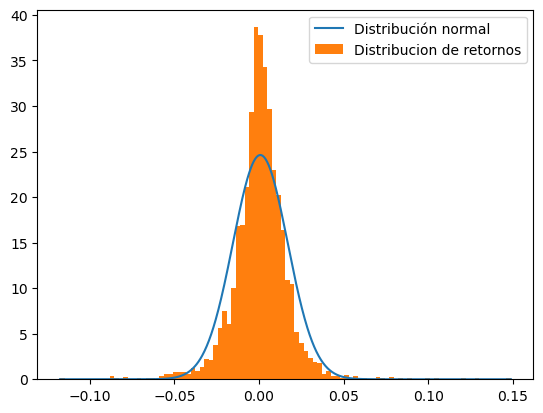

In [7]:
x_return = np.linspace(df_stock["returns"].min(),df_stock["returns"].max(), 1000) #aquí se crean los puntos
y_returns = norm.pdf(x_return, np.mean(df_stock["returns"]), np.std(df_stock["returns"])) #y la forma de la distribución

#Visualización de la gráfica
plt.plot(x_return, y_returns, label="Distribución normal")
df_stock["returns"].hist(bins=100, density=True, label="Distribucion de retornos")
plt.grid(False)
plt.legend()
plt.show() #Los retornos se salen de la distrubución aunque en principio parece una districuvión normal

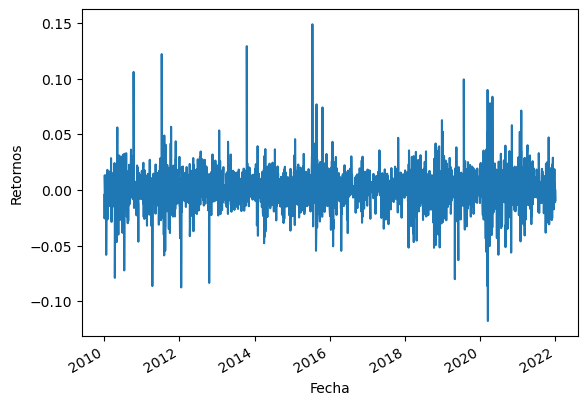

In [8]:
#Visualización de los retornos
df_stock["returns"].plot()
plt.xlabel("Fecha")
plt.ylabel("Retornos")
plt.grid(False)
plt.show() #Ver la variacion de los retornos
#Podemos ver que la varianza y el promedio van variando en el tiempo ya que existe variaciones en los retornos.
#Si se ve como en este caso que existen estas variaciones puede ser interesante aplicar un modelos que no necesiten de una distribución normal.

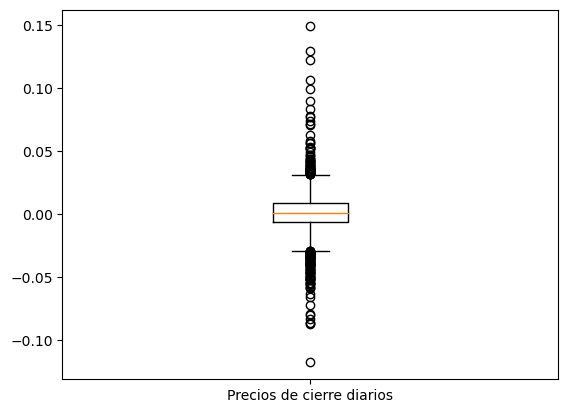

In [9]:
plt.boxplot(df_stock["returns"],labels=["Precios de cierre diarios"])
plt.grid(False)
plt.show() #Permite visualizar outliers positivos y negativos.

In [10]:
skew(df_stock["returns"]), kurtosis(df_stock["returns"]) #Esta info ayuda a ver como se distrubuyen los datos.
#Si la skew es positiva quiere decir que hay máss outliers positivos que negativos.
#En una distribución normal la skew suele ser 0.
#La kourtosis sirve para ver los valores extremos, en una distribución normal suele ser 3.
#En una disribución con más de 3 de kourtosis indicaría que hay muchos valores extremos.

(0.2928630006152206, 9.652138756345554)

In [11]:
skewtest(df_stock["returns"]), kurtosistest(df_stock["returns"])
#Este test es muy interesante en base al valor de pvalue que nos ofrece, 
#en general si el pvalue es menor de 5 podemos rechazar la hipotesis nula de que los datos siguen una distribución normal.
#En este caso es menor de 5 por lo que podemos rechazarla


(SkewtestResult(statistic=6.453934813354154, pvalue=1.089827035237342e-10),
 KurtosistestResult(statistic=22.931475714752942, pvalue=2.2555346448008074e-116))

((array([-3.50361687, -3.26000468, -3.12529382, ...,  3.12529382,
          3.26000468,  3.50361687]),
  array([-0.11766725, -0.08749332, -0.08630781, ...,  0.12208011,
          0.12923968,  0.14887184])),
 (0.015429216392349962, 0.0007372827597972755, 0.9510069456738284))

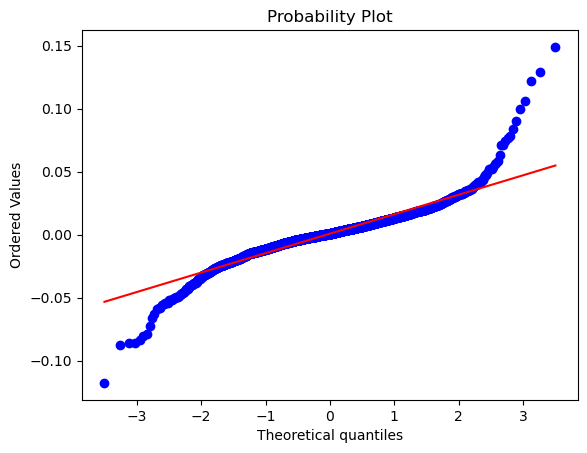

In [12]:
probplot(df_stock["returns"], dist="norm", plot=plt)#En esta grafica podemos visualizar si se sigue la distribución normal
#La distribución normal seguiría la linea roja y la azul los retornos